In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

[0] minimum sample size per bin: 45
70 149 [3.41 4.99]
[1] minimum sample size per bin: 46
58 117 [3.17 4.35]
[2] minimum sample size per bin: 52
45 94 [2.91 3.89]
[3] minimum sample size per bin: 43
15 46 [2.31 2.93]


(0.0, 1.0)

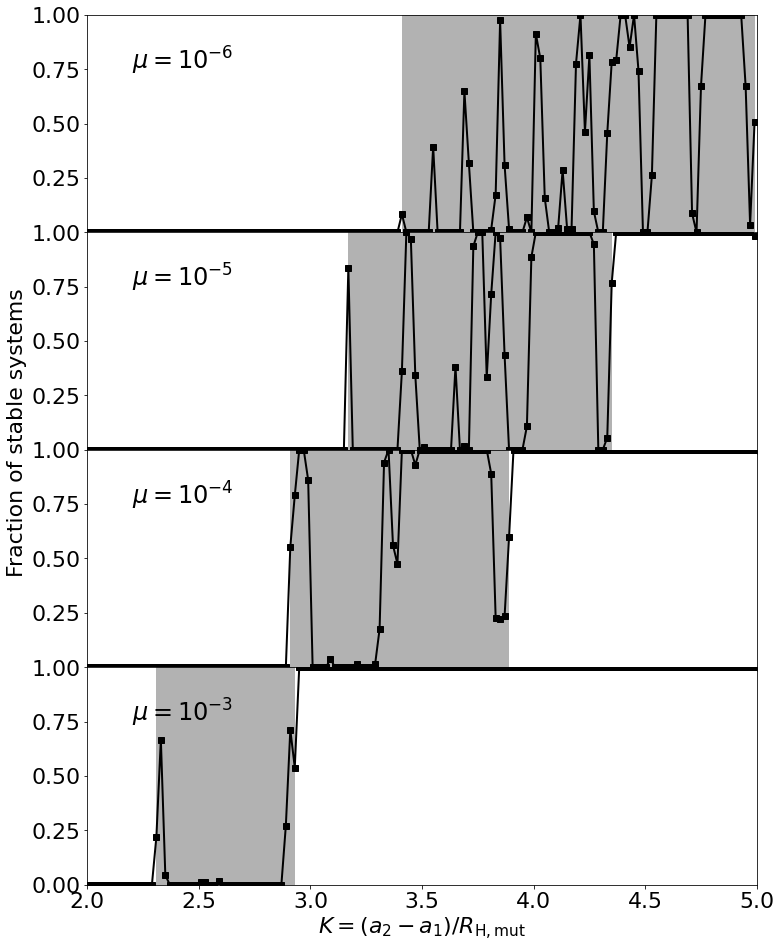

In [12]:
def resonance_to_K(res_val,mu):
    #P1 = 1**(-1.5)
    #P2 = P1*res_val
    a1 = 1. #P1**(2./3.)
    a2 = a1*(res_val)**(2./3.) #P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH, a2

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('./data/map5K/res-e5/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    k = eps1range/rH
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    tinst = np.minimum(tinst, tmax)
    
    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(k,bins=edges)
    print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    
    safe_hist, edges = np.histogram(k[tinst>=(1e5-10)],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2)
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    print(igzmin,igzmax,bins[[igzmin,igzmax]])
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.3)
    

                
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])
    axs[iii].text(2.2,0.75,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,5.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

#plt.savefig('./pics/pics-fraction_nf-map-rev.pdf',bbox_inches='tight',transparent=True)
#plt.savefig('./pics/pics-fraction_nf-map-rev.png',bbox_inches='tight',transparent=True)

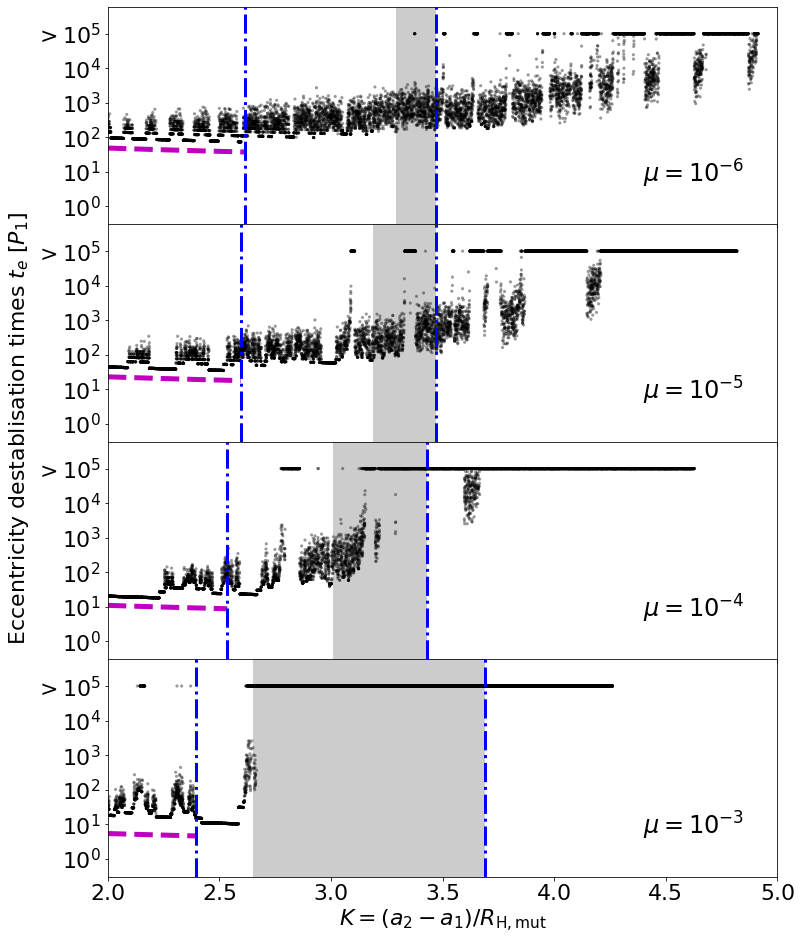

In [21]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn


K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]
K_syn_list = [2.616161616161616,2.595959595959596,2.5353535353535355,2.393939393939394]

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,1, sharex=True, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('./data/map5K/res-e5/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    Rm = (2+eps1range)/2.*(mu/3.)**(1./3.)
    K = eps1range/Rm
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    
    axs[iii].scatter(K,Tinst,c='k',s=10,alpha=0.4,edgecolors='none',rasterized=True)
    axs[iii].set_yscale('log')
    axs[iii].set_ylim([3.0e-1,6e5])
    axs[iii].set_yticks([1e0,1e1,1e2,1e3,1e4,1e5])
    axs[iii].set_yticklabels([r'$10^{0}$',r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])

            

    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    K_syn = K_syn_list[iii]
    
    Kl = np.linspace(2,K_syn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    axs[iii].plot(Kl,Tsynl,c='m',lw=5,ls='--')
    
    axs[iii].axvline(x=K_syn,c='b',lw=3,ls='-.')
    axs[iii].axvline(x=K_crit,c='b',lw=3,ls='-.')
    axs[iii].fill_between([K_gz,K_crit],[1e-2,1e-2],[1e6,1e6],edgecolor='none',facecolor='k',alpha=0.2)
    
    axs[iii].text(4.4,5,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel(r'                                   Eccentricity destablisation times $t_{e}$ [$P_1$]')

axs[-1].set_xlim([2.0,5.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-time_nf-map-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_nf-map-rev.png',bbox_inches='tight',transparent=True)

t4: 4.99
t4: 4.290000000000001
t4: 3.39
t4: 2.9299999999999997
t2: 3.91
t2: 3.71
t2: 3.37
t2: 2.91


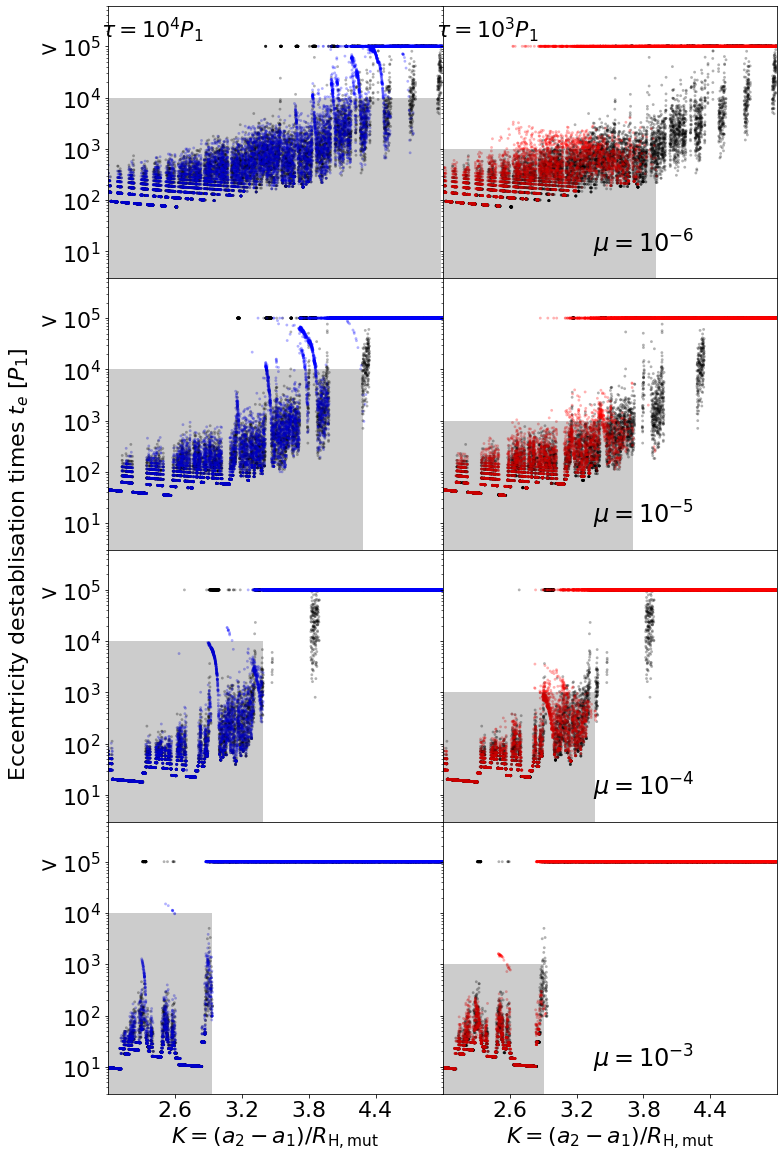

In [19]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

K_syn_list = [2.616161616161616,2.595959595959596,2.5353535353535355,2.393939393939394]

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]


fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0,wspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('./data/map5K/res-mu1/m%1dt0.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range/rH
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,0].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].set_yscale('log')
    axs[iii,0].set_ylim([3.0e0,6e5])
    axs[iii,0].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,0].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])  
    axs[iii,1].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e5])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,1].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$']) 
    axs[iii,1].text(3.35,1e1,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,4,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    

    #K_crit_fit = np.interp(4, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,0].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
    #K_crit_fit = np.interp(2, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,1].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)
    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('./data/map5K/res-mu1/m%1dt4.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range/rH
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,0].scatter(K,Tinst,c='b',s=8,alpha=0.3,edgecolors='none',rasterized=True)

    edges = np.linspace(2,5,151)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(K,bins=edges)
    
    safe_hist, edges = np.histogram(K[Tinst>=(1e5-10)],bins=edges)
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    #print(igzmin,igzmax,bins[[igzmin,igzmax]])    
    K_crit = bins[igzmax]
    print('t4:',K_crit)
    axs[iii,0].fill_between([2,K_crit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
            
for iii in [0,1,2,3]:  
    mu = mu_l[iii]
    eps1range,nconjcrit = np.loadtxt('./data/map5K/res-mu1/m%1dt3.dat'%(dir_name_list[iii]))
    neps1 = len(eps1range)
    rH = (float(mu)/3)**(1/3) # Hill radius
    K = eps1range/rH
    tsyn = 2/(3*eps1range) # initial synodic period in units of P1
    Tinst = nconjcrit*tsyn
    
    tmax = 1e5 # if we want to cap it to 1e5 P1
    Tinst = np.minimum(Tinst, tmax)
    axs[iii,1].scatter(K,Tinst,c='r',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(K,bins=edges)
    
    safe_hist, edges = np.histogram(K[Tinst>=(1e5-10)],bins=edges)
    
    dpc = 0.04
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))-1
    #print(igzmin,igzmax,bins[[igzmin,igzmax]])    
    K_crit = bins[igzmax]    
    print('t2:',K_crit)
    axs[iii,1].fill_between([2,K_crit],[1e-2,1e-2],[1e3,1e3],edgecolor='none',facecolor='k',alpha=0.2)
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()

axs[0,0].text(2.4,1.5e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.4,1.5e5,r'$\tau=10^{3}P_1$',ha='center')

axs[-1,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[-1,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2,0].set_ylabel(r'                                   Eccentricity destablisation times $t_{e}$ [$P_1$]')

axs[-1,0].set_xlim([2.0,5.0])
axs[-1,1].set_xlim([2.0,5.0])
axs[-1,0].set_xticks([2.6,3.2,3.8,4.4])
axs[-1,1].set_xticks([2.6,3.2,3.8,4.4])

plt.savefig('./pics/pics-time_wf-wRH-rev.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-wRH-rev.png',bbox_inches='tight',transparent=True)